## Khai báo các thư viện cần thiết

In [26]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, f1_score
from my_algorithm import algorithm

## đọc file csv ở trong máy tính
df = DataFrame

In [27]:
df = pd.read_csv("D:\data.csv")

in ra 10 giá trị đầu tiên

In [28]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


# Ý nghĩa của 32 thuộc tính trong dữ liệu:

1. id: Mã định danh của mỗi bệnh nhân hoặc mẫu.
2. diagnosis: Kết quả chẩn đoán, thường sẽ là "M" (Malignant - ác tính) hoặc "B" (Benign - lành tính).
3. radius_mean: Bán kính trung bình của khối u, thường được tính từ chu vi.
4. texture_mean: Độ nhám trung bình trên bề mặt khối u.
5. perimeter_mean: Chu vi trung bình của khối u.
6. area_mean: Diện tích trung bình của khối u.
7. smoothness_mean: Độ nhẵn trung bình của khối u, biểu thị độ đều của đường viền.
8. compactness_mean: Độ chặt trung bình của khối u, tính bằng công thức (chu vi^2 / diện tích - 1.0).
9. concavity_mean: Mức độ lõm trung bình trong đường viền của khối u.
10. concave points_mean: Số điểm lõm trung bình trên đường viền của khối u.
11. symmetry_mean: Độ đối xứng trung bình của khối u.
12. fractal_dimension_mean: Kích thước fractal trung bình của khối u, chỉ số cho thấy mức độ phức tạp của hình dạng.
13. --> 22 Các thuộc tính có hậu tố "_se" (như radius_se, texture_se, ...) là sai số chuẩn của các giá trị tương ứng, cho biết mức độ biến thiên của các thuộc tính này.
23. --> 32 Các thuộc tính có hậu tố "_worst" (như radius_worst, texture_worst, ...) là giá trị lớn nhất của các thuộc tính tương ứng, biểu thị kích thước hoặc độ nặng nhất của khối u trong các đặc điểm này.

Những thuộc tính này thường được sử dụng để phân tích và chẩn đoán ung thư vú, đặc biệt trong việc phân biệt giữa khối u ác tính và lành tính dựa trên hình thái và các đặc điểm bề mặt của khối u.

Hiển thị kích thước của bảng dữ liệu

In [29]:
df.shape

(569, 33)

## Làm sạch dữ liệu và phân tích

Hiển thị thông tin tóm tắt về DataFrame df. Cụ thể cung cấp các thông tin sau:
- Số hàng và số cột của df
- Tên cột và loại dữ liệu tương ứng của từng cột
- Số lượng giá trị không bị thiếu của từng cột
- Tổng dung lượng bộ nhớ mà df sử dụng

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Lệnh **df.isna().sum()** trong pandas được sử dụng để kiểm tra số lượng giá trị bị thiếu (NaN - Not a Number) trong mỗi cột của DataFrame df. Cụ thể:
- **df.isna()**: Trả về một DataFrame với các giá trị boolean, trong đó True chỉ ra giá trị bị thiếu (NaN) và False chỉ ra giá trị không bị thiếu.
- **sum()**: Tổng hợp số lượng giá trị True (giá trị bị thiếu) trong mỗi cột.
Kết quả là một danh sách cho biết số lượng giá trị thiếu trong từng cột của DataFrame.

In [31]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Lệnh **df['diagnosis'].value_counts()** trong pandas được sử dụng để đếm số lượng các giá trị khác nhau trong cột diagnosis của DataFrame df.

Cụ thể, nếu cột diagnosis chứa các giá trị như 'M' (malignant - ác tính) và 'B' (benign - lành tính), lệnh này sẽ trả về số lượng các mẫu tương ứng cho mỗi loại chẩn đoán. Kết quả sẽ là một bảng liệt kê số lượng các giá trị xuất hiện trong cột, giúp bạn hiểu rõ sự phân bố của các nhãn chẩn đoán trong dữ liệu.

In [32]:
print(df['diagnosis'].value_counts())
# tính tỉ lệ phần trăm của biến mục tiêu
# cú pháp df['tên cột'].value_counts(True)
df['diagnosis'].value_counts(True)

diagnosis
B    357
M    212
Name: count, dtype: int64


diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

Đếm số mẫu dữ liệu nhận giá trị là 0 ở mỗi thuộc tính:

In [33]:
zero_count = (df == 0).sum()
zero_count

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             13
concave points_mean        13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               13
concave points_se          13
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            13
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
Unnamed: 32                 0
dtype: int

# Xử lý ngoại lai: các thuộc tính có giá trị là 0

Bằng cách thay giá trị 0 trong cột bằng giá trị trung bình của các phần tử khác 0 trong cột

In [34]:
print("Dữ liệu ban đầu:")
print(df)

# Tính giá trị trung bình của cột 'col1', bỏ qua các giá trị 0
mean_value_concavity_mean = df[df['concavity_mean'] != 0]['concavity_mean'].mean()
mean_value_concave_points_mean = df[df['concave points_mean'] != 0]['concave points_mean'].mean() 
mean_value_concavity_se = df[df['concavity_se'] != 0]['concavity_se'].mean()
mean_value_concave_points_se = df[df['concave points_se'] != 0]['concave points_se'].mean()
mean_value_concave_concave_points_worst = df[df['concave points_worst'] != 0]['concave points_worst'].mean()

# Thay thế tất cả các giá trị 0 trong cột 'col1' bằng giá trị trung bình
df['concavity_mean'] = df['concavity_mean'].replace(0, mean_value_concavity_mean)
df['concave points_mean'] = df['concave points_mean'].replace(0, mean_value_concave_points_mean)
df['concavity_se'] = df['concavity_se'].replace(0, mean_value_concavity_se)
df['concave points_se'] = df['concave points_se'].replace(0, mean_value_concave_points_se)
df['concave points_worst'] = df['concave points_worst'].replace(0, mean_value_concave_concave_points_worst)


print("\nDữ liệu sau khi thay thế 0 bằng giá trị trung bình:")
print(df)


Dữ liệu ban đầu:
           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoot

Lệnh df['diagnosis'].replace({"B":"0", "M":"1"}, inplace=True) trong pandas được sử dụng để thay thế các giá trị trong cột diagnosis của DataFrame df:

- "B" (Benign - lành tính) sẽ được thay thế bằng "0".
- "M" (Malignant - ác tính) sẽ được thay thế bằng "1".
- Tham số inplace=True đảm bảo rằng các thay đổi sẽ được thực hiện trực tiếp trong DataFrame mà không cần tạo một bản sao mới. Đây là cách chuyển đổi nhãn từ dạng ký tự sang dạng số để dễ xử lý trong các mô hình học máy.

In [35]:
df['diagnosis'].replace({"B":"0", "M":"1"}, inplace=True)

Lệnh sns.catplot(x='diagnosis', data=df, kind='count') sử dụng thư viện **Seaborn** để tạo biểu đồ cột (count plot) hiển thị số lượng các giá trị khác nhau trong cột diagnosis của DataFrame df.

- x='diagnosis': Trục x hiển thị các giá trị của cột diagnosis (ví dụ: 0 và 1 sau khi đã thay thế).
- data=df: Sử dụng dữ liệu từ DataFrame df.
- kind='count': Tạo biểu đồ cột, trong đó chiều cao của các cột biểu thị số lượng mỗi loại giá trị trong cột diagnosis.

Biểu đồ này giúp trực quan hóa sự phân bố các nhãn lành tính và ác tính.

Seaborn là một thư viện trực quan hóa dữ liệu được xây dựng trên Matplotlib, cung cấp giao diện dễ sử dụng cho việc tạo các biểu đồ thống kê. Các tính năng chính của Seaborn bao gồm:

- Biểu đồ phân bố (distribution plots): như distplot, kdeplot để hiển thị phân phối của dữ liệu.
- Biểu đồ quan hệ (relational plots): như scatterplot, lineplot để biểu diễn mối quan hệ giữa các biến.
- Biểu đồ phân loại (categorical plots): như barplot, boxplot, catplot để so sánh giữa các nhóm.

Hỗ trợ quản lý màu sắc và các bảng màu để hiển thị dễ hiểu hơn.

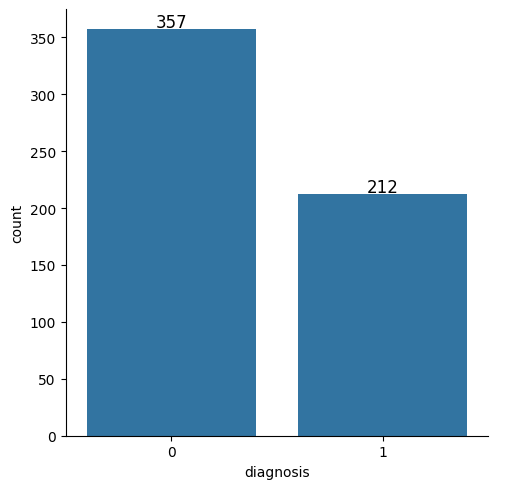

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Tạo catplot, mỗi thế này thôi cũng in ra được rồi nhưng mà sẽ không hiển thị 357 và 212
g = sns.catplot(x='diagnosis', data=df, kind='count')

# Lấy trục (axis) của biểu đồ để thêm nhãn
ax = g.ax

# Sửa nhãn trên trục x, đổi kiểu này hơi nghiệp dư
#ax.set_xticklabels(['0', '1'])  # Đổi nhãn từ 0.0 thành 0 và 1.0 thành 1

# Chuyển đổi nhãn trên trục x sang dạng số nguyên
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Chuyển số thực thành số nguyên

# Chèn số lượng vào cột đầu tiên và cột thứ hai
# Lấy các đối tượng cột từ ax.patches
for i, p in enumerate(ax.patches):
    # Lấy số lượng từ chiều cao của cột
    count = int(p.get_height())  # Chuyển đổi số lượng thành số nguyên
    
    # Chèn số lượng vào cột đầu tiên và thứ hai
    if i == 0:  # Cột đầu tiên
        ax.annotate(f'{count}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Vị trí nhãn
                    ha='center', va='center',  # Căn chỉnh nhãn
                    fontsize=12, color='black',  # Cài đặt phông chữ và màu sắc
                    xytext=(0, 5), textcoords='offset points')  # Khoảng cách nhãn
    elif i == 1:  # Cột thứ hai
        ax.annotate(f'{count}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Vị trí nhãn
                    ha='center', va='center',  # Căn chỉnh nhãn
                    fontsize=12, color='black',  # Cài đặt phông chữ và màu sắc
                    xytext=(0, 5), textcoords='offset points')  # Khoảng cách nhãn

# Hiển thị biểu đồ
plt.show()


Lệnh df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True) trong pandas được sử dụng để xóa hai cột 'id' và 'Unnamed: 32' ra khỏi DataFrame df.

- axis=1: Chỉ định rằng bạn đang xóa cột (nếu axis=0, bạn sẽ xóa hàng).
- inplace=True: Thực hiện thay đổi trực tiếp trên DataFrame df mà không cần tạo một bản sao mới.

Lệnh này thường được dùng để loại bỏ những cột không cần thiết hoặc không có giá trị phân tích.

Cột Unnamed: 32 thường xuất hiện trong dữ liệu khi có một cột thừa hoặc không được đặt tên, ví dụ, do lỗi khi nhập dữ liệu từ file CSV. Nó có thể là một cột trống hoặc chứa các giá trị không cần thiết. Trong trường hợp này, lệnh df.drop(['Unnamed: 32'], axis=1) được sử dụng để loại bỏ cột này nhằm làm sạch dữ liệu trước khi tiến hành các phân tích hoặc mô hình hóa.

In [37]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [38]:
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


Lệnh df.describe().T trong pandas được sử dụng để tạo ra bảng thống kê tóm tắt các đặc trưng số học của DataFrame df.

- df.describe(): Hiển thị các giá trị thống kê cơ bản cho các cột số (như count, mean, std, min, 25%, 50%, 75%, max).
- .T: Là viết tắt của transpose, giúp chuyển đổi các hàng thành cột và cột thành hàng, tạo ra một định dạng dễ xem hơn.
Kết quả sẽ hiển thị các thống kê cho từng cột trong DataFrame dưới dạng hàng.

Các giá trị thống kê trong df.describe() bao gồm:

- count: Số lượng giá trị không bị thiếu (NaN) trong cột.
- mean: Giá trị trung bình của cột.
- std: Độ lệch chuẩn, đo lường mức độ phân tán của dữ liệu.
- min: Giá trị nhỏ nhất trong cột.
- 25%: Phân vị thứ 25 (dữ liệu ở dưới mức này chiếm 25%).
- 50% (median): Phân vị thứ 50, hay còn gọi là trung vị.
- 75%: Phân vị thứ 75 (dữ liệu ở dưới mức này chiếm 75%).
- max: Giá trị lớn nhất trong cột.

**std là độ lệch chuẩn của dữ liệu thuộc tính**
$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2}
$$

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.090876,0.078553,0.000692,0.031360,0.066640,0.130700,0.42680
concave points_mean,569.0,0.050063,0.038074,0.001852,0.021070,0.037000,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Lệnh df['diagnosis'] = df['diagnosis'].astype(float) trong pandas được sử dụng để chuyển đổi kiểu dữ liệu của cột diagnosis từ một kiểu khác (ví dụ: chuỗi hoặc số nguyên) sang kiểu float (số thập phân).

Điều này có thể cần thiết nếu bạn đang chuẩn bị dữ liệu cho các mô hình học máy hoặc phân tích yêu cầu cột phải có kiểu số thực. Sau khi lệnh này được thực hiện, các giá trị trong cột diagnosis sẽ ở dạng số thập phân (ví dụ: 0.0, 1.0).

In [40]:
df['diagnosis'] = df['diagnosis'].astype(float)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Lệnh correlation = df.corr() trong pandas tính ma trận tương quan giữa các cột số trong DataFrame df. Tương quan là một chỉ số thống kê mô tả mức độ và hướng mối quan hệ giữa hai biến. Kết quả của lệnh này là một ma trận vuông, trong đó các giá trị nằm trong khoảng từ -1 đến 1:

- 1: Hai biến có mối tương quan dương hoàn hảo.
- -1: Hai biến có mối tương quan âm hoàn hảo.
- 0: Không có mối tương quan giữa hai biến.

Ma trận này giúp bạn hiểu được mối quan hệ giữa các đặc trưng trong dữ liệu.

In [42]:
correlation = df.corr()

plt.figure(figsize=(25,25)): Tạo một figure với kích thước lớn, cụ thể là 25x25 inch, để biểu đồ có đủ không gian hiển thị thông tin chi tiết và rõ ràng hơn.

sns.heatmap(): Đây là hàm tạo biểu đồ nhiệt (heatmap) từ thư viện Seaborn. Biểu đồ nhiệt trực quan hóa ma trận tương quan của các biến bằng cách sử dụng các màu sắc khác nhau.

correlation: Đây là ma trận tương quan đã được tính bằng df.corr(), chứa hệ số tương quan giữa các cột trong DataFrame.

annot=True: Hiển thị giá trị số (hệ số tương quan) trong từng ô của heatmap.

cmap='mako': Thiết lập bảng màu cho heatmap. Ở đây, mako là một bảng màu có sẵn trong Seaborn, với các màu từ xanh đậm đến xanh nhạt.

Để tính toán các giá trị tương quan xuất hiện trong heatmap, bạn sử dụng hệ số tương quan của Pearson. Công thức để tính hệ số tương quan giữa hai biến 𝑋 và 𝑌 là:

$$
r_{xy} = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum{(X_i - \bar{X})^2} \sum{(Y_i - \bar{Y})^2}}}
$$


<Axes: >

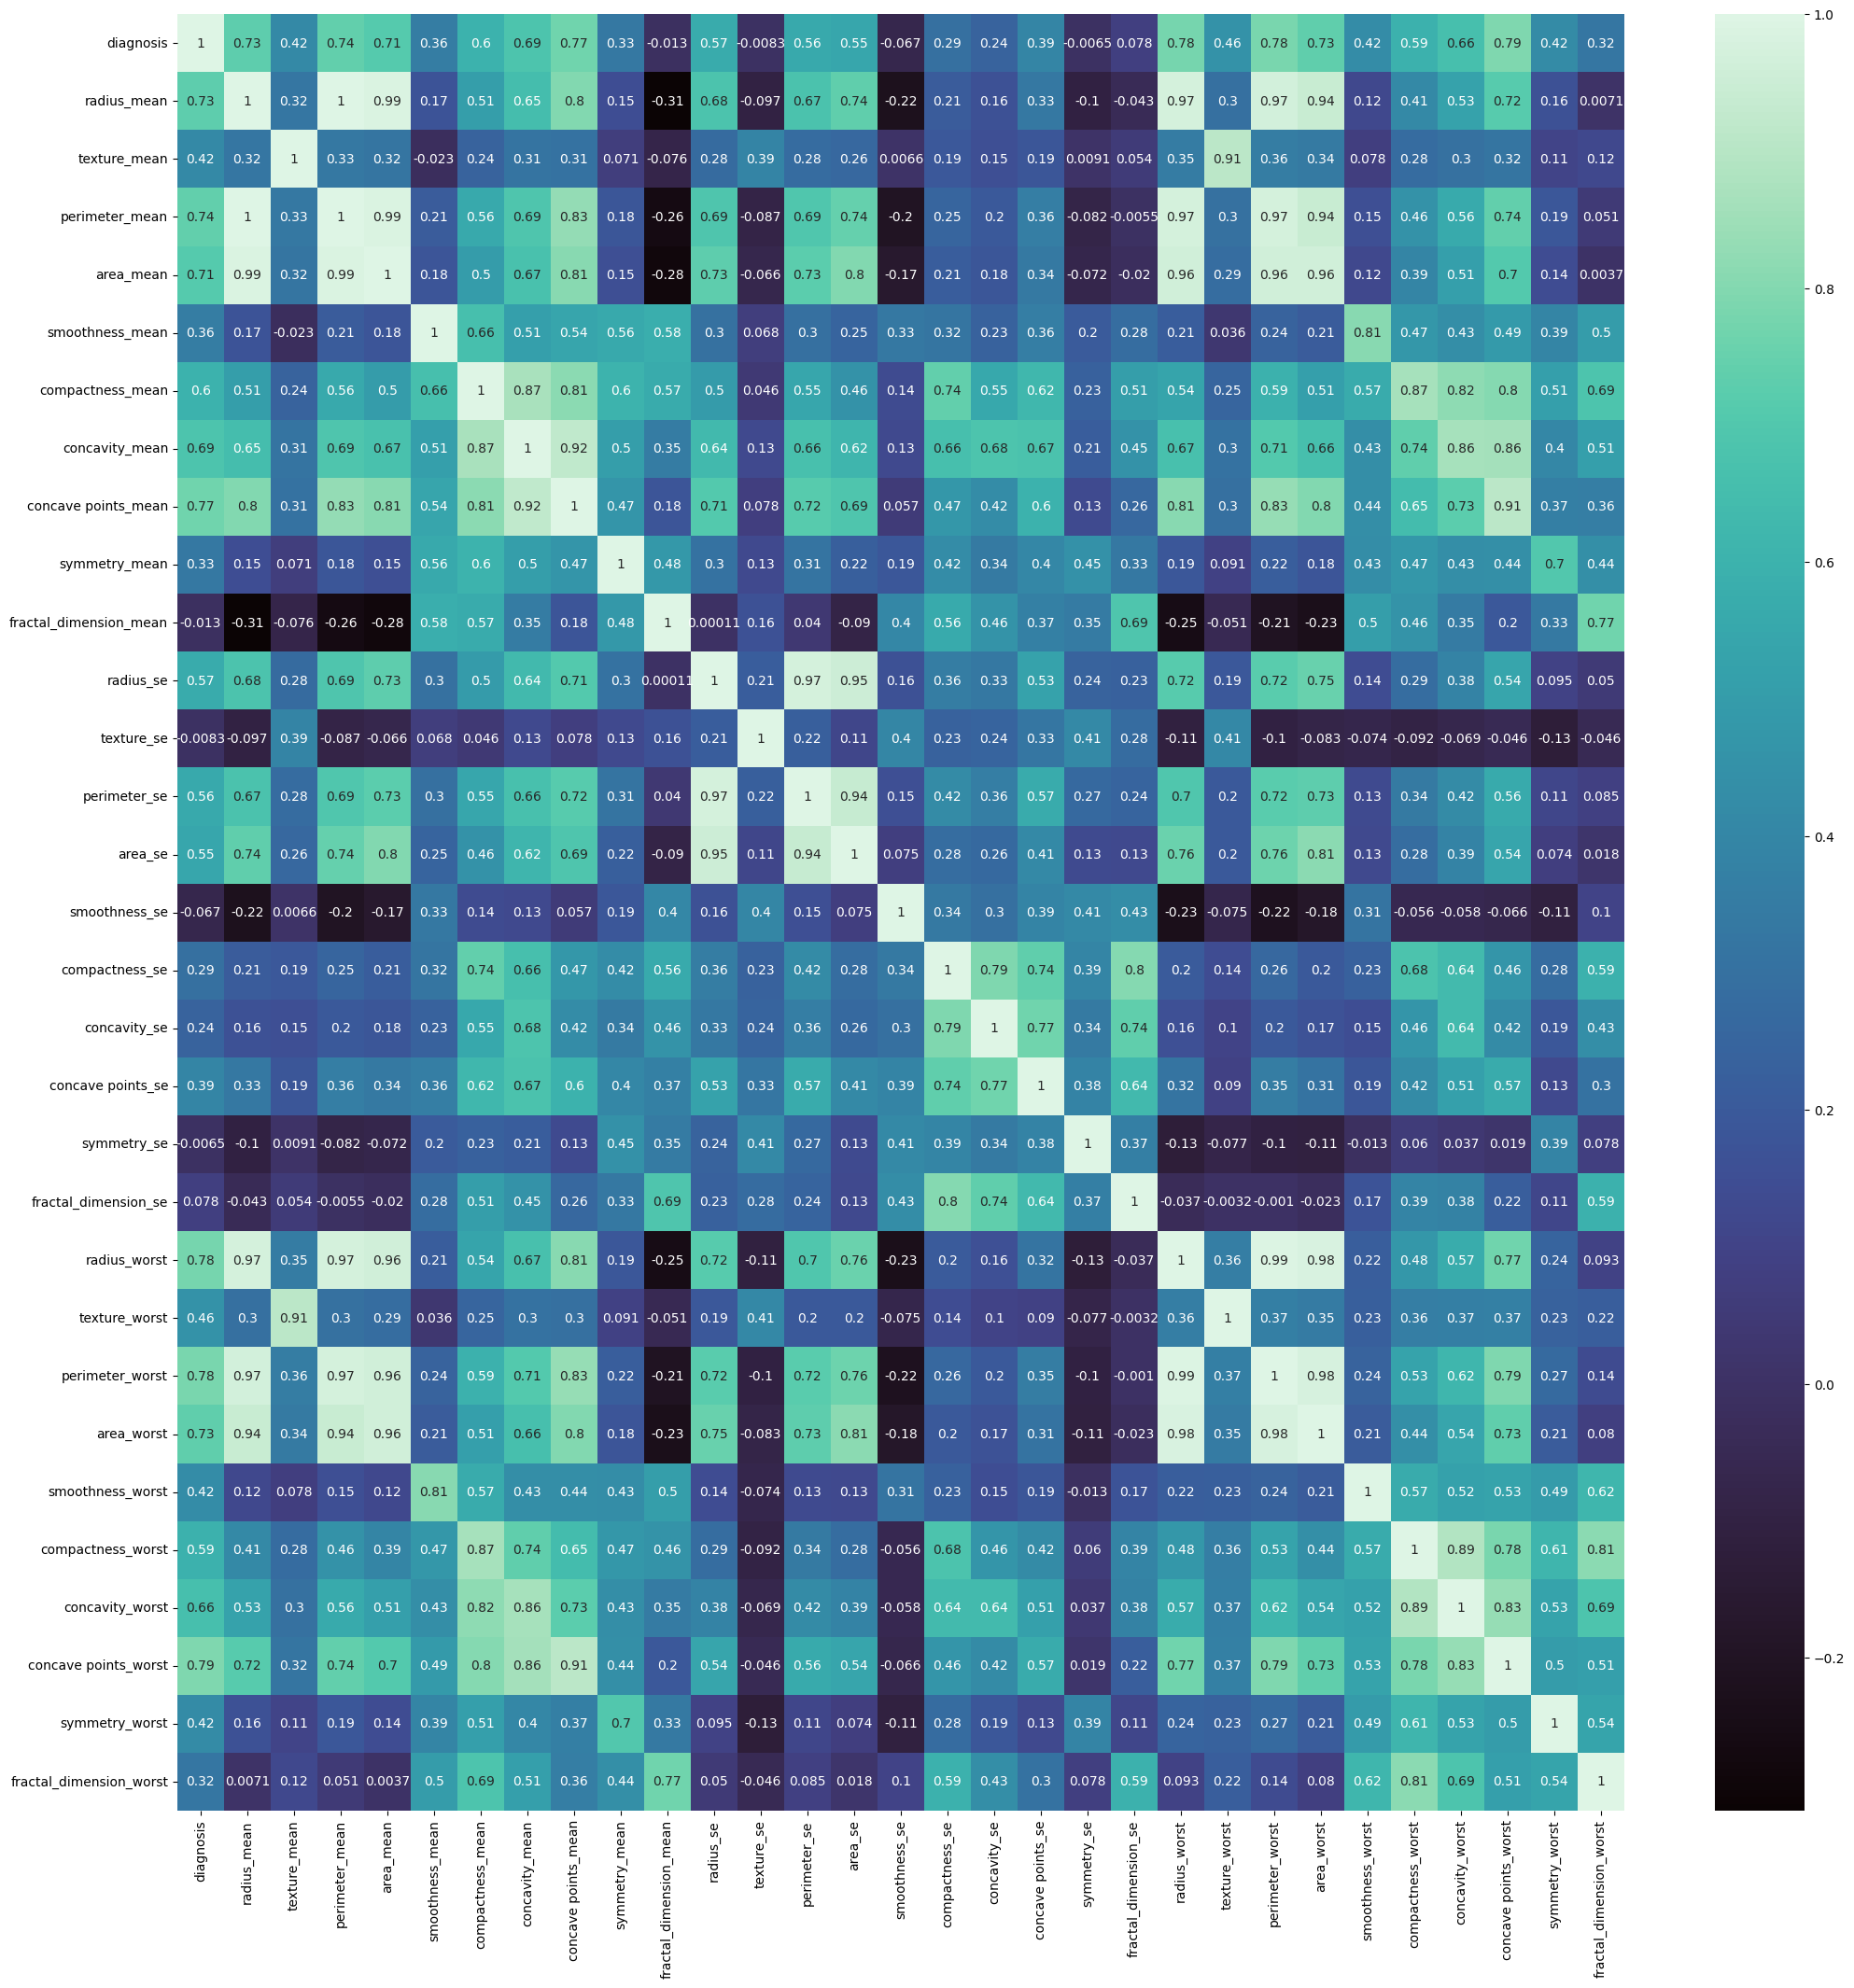

In [43]:
plt.figure(figsize=(25,25))
sns.heatmap(correlation, annot=True, cmap='mako')

Biến threshold được đặt là 0.75, có nghĩa là chỉ những biến có tương quan tuyệt đối với biến diagnosis lớn hơn hoặc bằng 0.75 sẽ được xem xét.

- correlation["diagnosis"]: Đây là cột chứa hệ số tương quan giữa diagnosis và các biến khác.
- np.abs(): Lấy giá trị tuyệt đối của hệ số tương quan, để kiểm tra cả mối tương quan âm và dương.
- > threshold: Chọn những hệ số tương quan có giá trị lớn hơn ngưỡng (0.75).

Kết quả của dòng này là một biến filter, chứa các giá trị True/False cho biết biến nào có tương quan lớn hơn ngưỡng 0.75.

- correlation.columns[filter]: Lấy danh sách tên các cột có giá trị tương quan thỏa mãn điều kiện của filter.
- .tolist(): Chuyển danh sách các tên cột này thành một danh sách Python (list)

- f[correlation_features].corr(): Tính toán ma trận tương quan chỉ dựa trên các cột có tương quan cao (được lọc trước đó).
- sns.clustermap(): Tạo biểu đồ clustermap trong Seaborn. Đây là một loại biểu đồ giống heatmap nhưng có thêm tính năng phân cụm -(clustering) để nhóm các đặc trưng có tương quan tương tự lại với nhau.
- annot=True: Hiển thị các giá trị hệ số tương quan trực tiếp trên biểu đồ.
- fmt=".2f": Định dạng các giá trị hệ số tương quan với 2 chữ số thập phân.
- cmap='mako': Sử dụng bảng màu mako để tô màu các ô trong heatmap.

<Figure size 1000x800 with 0 Axes>

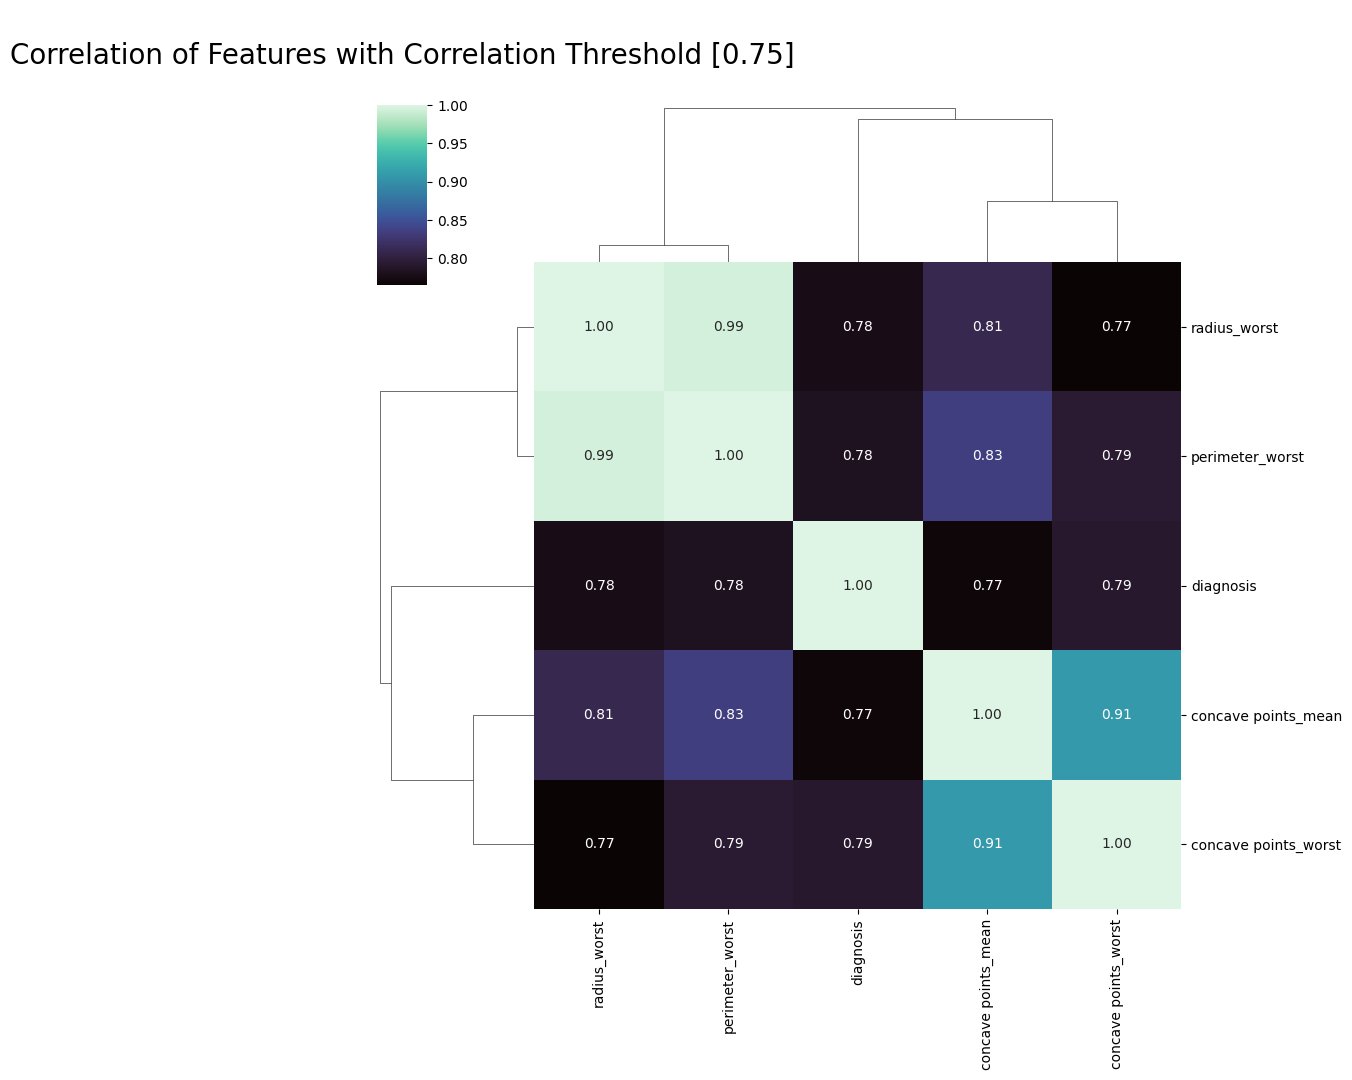

In [44]:
threshold = 0.75
filter = np.abs(correlation["diagnosis"] > threshold)
correlation_features = correlation.columns[filter].tolist()
plt.figure(figsize=(10,8)) # Thiết lập kích thước của figure với chiều rộng là 10 và chiều cao là 8 inch.
sns.clustermap(df[correlation_features].corr(), annot = True, fmt = ".2f", cmap='mako')
plt.title("\nCorrelation of Features with Correlation Threshold [0.75]\n",fontsize=20)
plt.show()

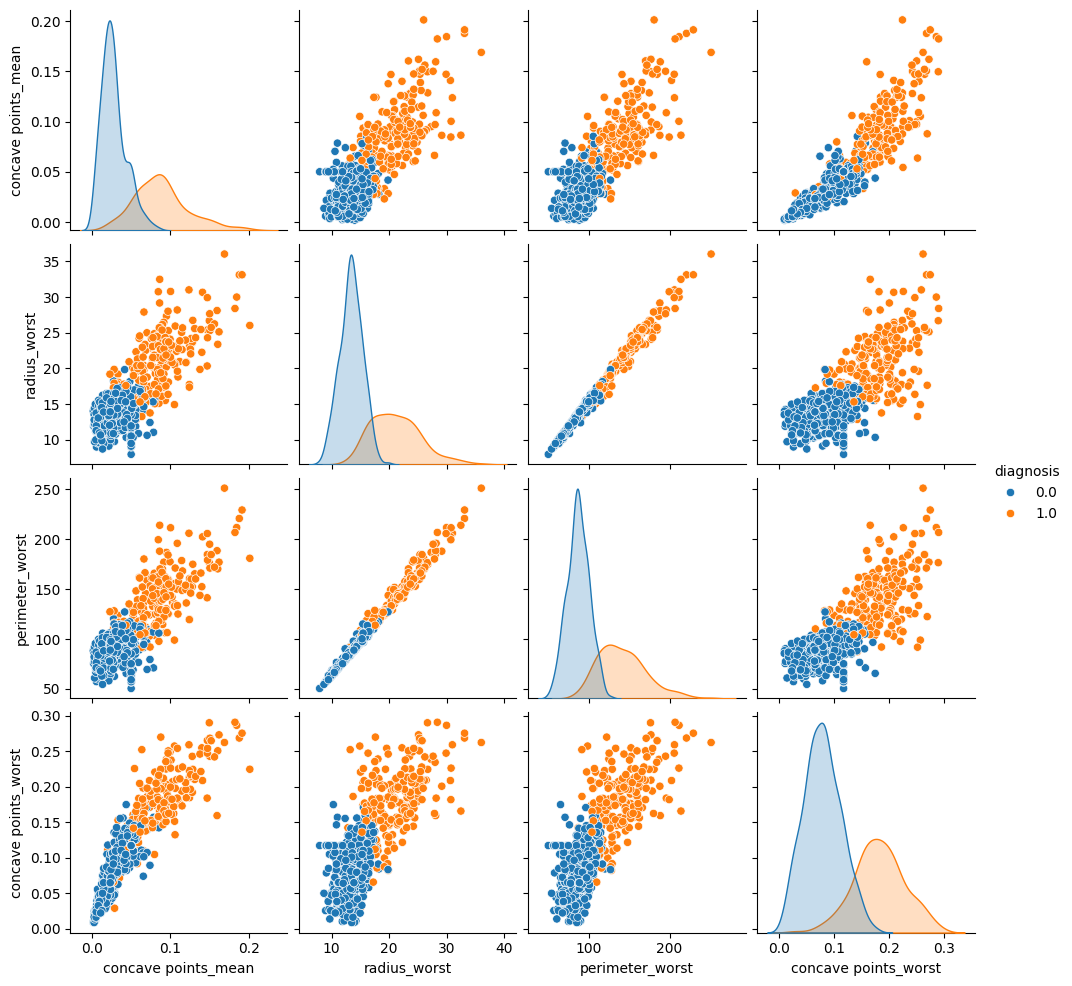

In [45]:
sns.pairplot(df[correlation_features], diag_kind = "kde",  hue="diagnosis")
plt.show()

- loại bỏ diagnosis khỏi df
- axit = 1 --> xóa cột
- phần còn lại của df <-- X: các biến đầu vào để dự đoán đầu ra y là diagnosis
- Từ ảnh ở trên rõ ràng là radius_worst và perimeter_worst có độ tương quan lớn --> ta bỏ 1 thuộc tính, ở đây bỏ radius_worst để tránh overfit 

In [46]:
X = df.drop(['diagnosis'], axis=1) #, 'radius_worst' nên bỏ hay không ?
y = df['diagnosis']

Chia dữ liệu thành tập huấn luyện (training set) và tập kiểm tra (test set)

train_test_split: Đây là hàm từ thư viện scikit-learn, được sử dụng để chia tập dữ liệu thành hai phần: tập huấn luyện và tập kiểm tra.

test_size=0.2:
- test_size chỉ định tỷ lệ dữ liệu sẽ được dùng làm tập kiểm tra.
- Ở đây, test_size=0.2 có nghĩa là 20% dữ liệu sẽ được sử dụng cho tập kiểm tra, và 80% dữ liệu còn lại sẽ được dùng cho tập huấn luyện.

random_state=42:
- random_state là một tham số được sử dụng để đảm bảo tính tái lập (reproducibility).
- Khi bạn thiết lập random_state=42, việc chia dữ liệu sẽ luôn tạo ra cùng một kết quả mỗi khi bạn chạy mã, đảm bảo kết quả là nhất quán khi bạn thử lại.
- Giá trị 42 không có ý nghĩa đặc biệt, nó chỉ là một số được dùng làm hạt ngẫu nhiên (random seed).

stratify=y:
- Tác dụng của nó là chia đều tỉ lệ cho cả các mẫu dữ liệu nhãn M và nhãn B.

Kết quả của train_test_split:
Hàm này trả về bốn biến:
- X_train: Tập đặc trưng huấn luyện, chứa 80% của X: gồm 80% mẫu dữ liệu của nhãn M, 80% mẫu dữ liệu của nhãn B.
- X_test: Tập đặc trưng kiểm tra, chứa 20% của X: gồm 20% mẫu dữ liệu của nhãn M, 20% mẫu dữ liệu của nhãn B.
- y_train: Tập nhãn huấn luyện, chứa 80% của y: là nhãn của X_train, tỷ lệ như trên.
- y_test: Tập nhãn kiểm tra, chứa 20% của y.

# --> Tóm lại là sử dụng phương pháp Stratified sampling do dữ liệu nhỏ (569 mẫu dữ liệu)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

# Chuẩn hóa dữ liệu
Đoạn mã này sử dụng StandardScaler từ thư viện scikit-learn để chuẩn hóa dữ liệu. Việc chuẩn hóa là một bước rất quan trọng trong quy trình học máy, đặc biệt là đối với các mô hình nhạy cảm với sự khác biệt về đơn vị đo của các đặc trưng (như SVM, KNN, Logistic Regression,...).

StandardScaler: Đây là một công cụ trong scikit-learn dùng để chuẩn hóa các đặc trưng của dữ liệu bằng cách tạo ra dữ liệu có phân phối chuẩn (normal distribution) với:
- Mean (trung bình) = 0.
- Standard Deviation (độ lệch chuẩn) = 1.

**Công thức chuẩn hóa**

Xét lần lượt từng cột thuộc tính, với mỗi x thì ta chuẩn hóa thành $x_{\text{scaled}}$ như sau:
$$
x_{\text{scaled}} = \frac{x - \mu}{\sigma}
$$

Trong đó:
- 𝑥 là giá trị của dữ liệu.
- N là số mẫu dữ liệu, ở đây cụ thể bằng 569
- $\mu$ là giá trị trung bình của đặc trưng, được tính như sau:
$$
\mu = \frac{x_1 + x_2 + x_3 + \dots + x_N}{N} 
$$

- $\sigma$ là độ lệch chuẩn của đặc trưng, được tính như sau:
$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
$$

In [48]:
s = StandardScaler()
#s = MinMaxScaler()

X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [49]:
Algorithm = ['RandomForest', 'KNeighborsClassifier','LogisticRegression','Naive Bayes', 'SVM', 'VotingClassifier']
Accuracy=[] # list lưu trữ độ chính xác của các mô hình học máy

# Thực hiện các bước huấn luyện và đánh giá một mô hình học máy (machine learning). 
Nó bao gồm việc hiển thị ma trận nhầm lẫn (confusion matrix), tính độ chính xác (accuracy), và in ra báo cáo phân loại (classification report).

Ma trận nhầm lẫn bao gồm:
- True Positive (TP): Số trường hợp mà mô hình dự đoán chính xác là Positive (đúng là Positive).
- True Negative (TN): Số trường hợp mà mô hình dự đoán chính xác là Negative (đúng là Negative).
- False Positive (FP): Số trường hợp mà mô hình dự đoán sai là Positive (thực tế là Negative).
- False Negative (FN): Số trường hợp mà mô hình dự đoán sai là Negative (thực tế là Positive). 

|              | Predicted Negative | Predicted Positive |
|--------------|--------------------|--------------------|
| Actual Negative | True Negative (TN)  | False Positive (FP) |
| Actual Positive | False Negative (FN) | True Positive (TP)  |

group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)] --> đưa các kết quả về phần trăm

Tính như sau: 
$$
TP\% = \frac{TP}{TP + TN + FP + FN}
$$

Tương tự với các thành phần còn lại

F1-score là một thước đo hiệu suất của mô hình, đặc biệt hữu ích khi dữ liệu mất cân bằng, như trong các bài toán y tế hoặc phát hiện gian lận. F1-score là trung bình điều hòa giữa precision (độ chính xác) và recall (độ nhạy), giúp bạn đánh giá mô hình một cách toàn diện hơn.

Công thức tính F1-score được tính dựa trên precision và recall với công thức:
$$
\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- Precision: Tỷ lệ dự đoán đúng trên tổng số lần mô hình dự đoán là dương.
$$
\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
$$

- Recall: Tỷ lệ dự đoán đúng trên tổng số mẫu thực tế là dương.
$$
\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$$

# Random Forest

In [50]:
from sklearn.model_selection import GridSearchCV

#Thiết lập bộ tham số
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'oob_score': [True, False],   # oob_score chỉ có tác dụng nếu bootstrap=True
    'class_weight': ['balanced', 'balanced_subsample']
}

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(random_state=42)

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring=make_scorer(f1_score, average='weighted'), n_jobs=-1)

# Huấn luyện GridSearchCV trên dữ liệu huấn luyện
grid_search.fit(X_train, y_train)

# Kết quả
print("Best parameters found: ", grid_search.best_params_)
RF_bootstrap = grid_search.best_params_['bootstrap']
RF_class_weight = grid_search.best_params_['class_weight']
RF_max_depth = grid_search.best_params_['max_depth']
RF_max_features = grid_search.best_params_['max_features']
RF_n_estimators = grid_search.best_params_['n_estimators']
RF_oob_score = grid_search.best_params_['oob_score']

print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'bootstrap': True, 'class_weight': 'balanced_subsample', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50, 'oob_score': True}
Best cross-validation score:  0.9699247507604083


confusion matrix


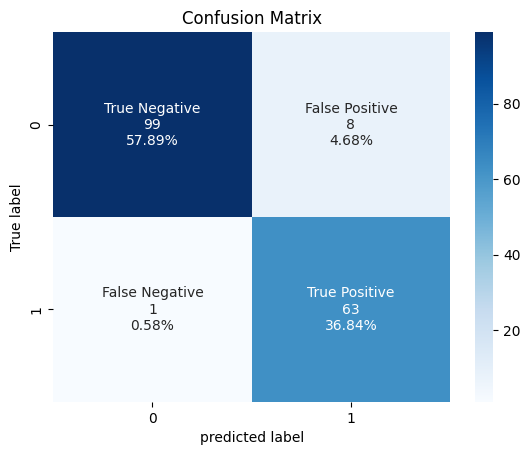

[[99  8]
 [ 1 63]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       107
         1.0       0.89      0.98      0.93        64

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

weighted_f1_score :  94.78430375455547


In [51]:
model_1 = RandomForestClassifier(
    bootstrap=RF_bootstrap,
    class_weight=RF_class_weight,
    max_depth=RF_max_depth,
    max_features=RF_max_features,
    n_estimators=RF_n_estimators,
    oob_score=RF_oob_score
)

algorithm(model_1, X_train, y_train, X_test, y_test, Accuracy)

# K Nearest Neighbor

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Thiết lập không gian tham số cho mô hình KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Số lượng hàng xóm lân cận (K)
    'weights': ['uniform', 'distance'],  # Trọng số hàng xóm (cân nhắc khoảng cách hoặc không)
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Đo lường khoảng cách
}

# Tìm kiếm tham số tối ưu
# Với scoring='f1': Sử dụng F1-score của lớp dương.
# Với scoring=make_scorer(f1_score, average='weighted'): Sử dụng weighted average F1-score.
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring=make_scorer(f1_score, average='weighted'))  # cv = 10 tức là k-fold ở đây k = 10
grid_search.fit(X_train, y_train)

# Kết quả
print("Best Parameters:", grid_search.best_params_)
knn_neighbors = grid_search.best_params_.get('n_neighbors')
knn_weights = grid_search.best_params_.get('weights')
knn_metric = grid_search.best_params_.get('metric')

print(knn_neighbors, knn_weights, knn_metric)

print("Best cross-validated score:", grid_search.best_score_)

# Sử dụng tham số tốt nhất để huấn luyện lại mô hình
best_knn_model = grid_search.best_estimator_
y_pred_optimized = best_knn_model.predict(X_test)

# Đánh giá mô hình tối ưu
print("\nConfusion Matrix (Optimized):")
print(confusion_matrix(y_test, y_pred_optimized))

print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_optimized))


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
3 uniform manhattan
Best cross-validated score: 0.9620795434659734

Confusion Matrix (Optimized):
[[105   2]
 [  2  62]]

Classification Report (Optimized):
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       107
         1.0       0.97      0.97      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



confusion matrix


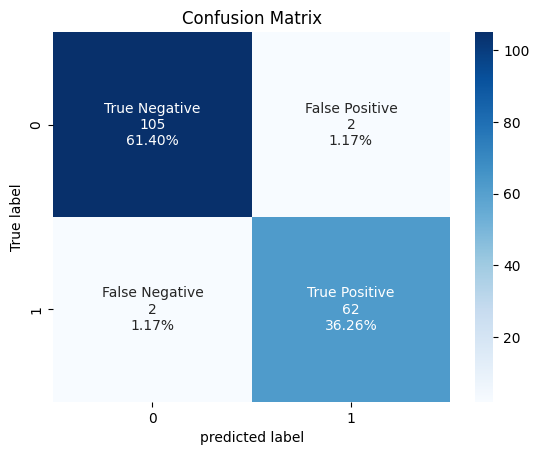

[[105   2]
 [  2  62]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       107
         1.0       0.97      0.97      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

weighted_f1_score :  97.6608187134503


In [53]:
"""
knn = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='euclidean',
    n_jobs=-1
)
"""
# tại sao chọn tham số như vậy ? 
# vì nó cho kết quả tốt nhất
# tại sao lại cho kết quả tốt nhất ?
# vì nó đã được tìm kiếm thông qua grid search
model_3 = KNeighborsClassifier(n_neighbors=knn_neighbors, weights=knn_weights, metric=knn_metric)
algorithm(model_3, X_train, y_train, X_test, y_test, Accuracy)

# Logistic Regression

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Định nghĩa không gian tham số
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# Khởi tạo LogisticRegression

# Grid Search
# verbose=1: Hiển thị quá trình tìm kiếm tham số tốt nhất
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=10, scoring=make_scorer(f1_score, average='weighted'), verbose=1)
grid_search.fit(X_train, y_train)

# Lấy kết quả tốt nhất
best_model = grid_search.best_estimator_
LR_C = grid_search.best_params_.get('C')
LR_penalty = grid_search.best_params_.get('penalty')
LR_solver = grid_search.best_params_.get('solver')
LR_max_iter = grid_search.best_params_.get('max_iter')
print("Best Parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

# Sử dụng tham số tốt nhất để huấn luyện lại mô hình
best_LR_model = grid_search.best_estimator_
y_pred_optimized = best_LR_model.predict(X_test)

# Đánh giá mô hình tối ưu
print("\nConfusion Matrix (Optimized):")
print(confusion_matrix(y_test, y_pred_optimized))

print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_optimized))


Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validated score: 0.9692320865259962

Confusion Matrix (Optimized):
[[105   2]
 [  0  64]]

Classification Report (Optimized):
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       107
         1.0       0.97      1.00      0.98        64

    accuracy                           0.99       171
   macro avg       0.98      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



confusion matrix


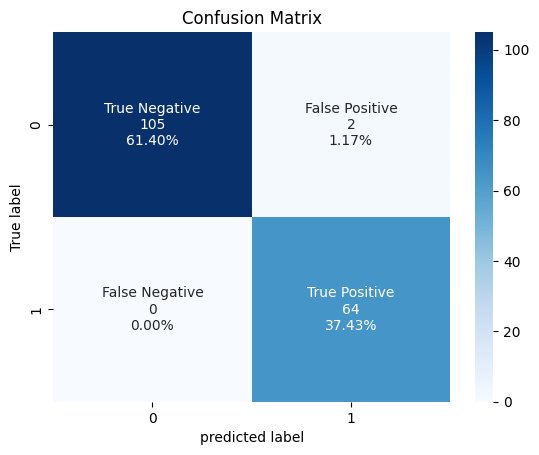

[[105   2]
 [  0  64]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       107
         1.0       0.97      1.00      0.98        64

    accuracy                           0.99       171
   macro avg       0.98      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

weighted_f1_score :  98.83388927083068


In [55]:
# LogisticRegression(tham số mặc định): C = 1.0, penalty = 'l2', solver = 'lbfgs', max_iter = 100
model_4 = LogisticRegression(C = LR_C, penalty = LR_penalty, solver = LR_solver, max_iter = LR_max_iter)
algorithm(model_4, X_train, y_train, X_test, y_test, Accuracy)

# Naive Bayes

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Thiết lập không gian tham số cho GaussianNB (chỉ có var_smoothing)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Giá trị var_smoothing cho GaussianNB
}

# Tìm kiếm tham số tối ưu
# Với scoring=make_scorer(f1_score, average='weighted'): Sử dụng weighted average F1-score.
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=10, scoring=make_scorer(f1_score, average='weighted'))  # cv = 5 tức là k-fold ở đây k = 5
grid_search.fit(X_train, y_train)

# Kết quả
print("Best Parameters:", grid_search.best_params_)
NB_var_smoothing = grid_search.best_params_.get('var_smoothing')
print("Best cross-validated score:", grid_search.best_score_)

# Sử dụng tham số tốt nhất để huấn luyện lại mô hình
best_NB_model = grid_search.best_estimator_
y_pred_optimized = best_NB_model.predict(X_test)

# Đánh giá mô hình tối ưu
print("\nConfusion Matrix (Optimized):")
print(confusion_matrix(y_test, y_pred_optimized))

print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_optimized))


Best Parameters: {'var_smoothing': 1e-09}
Best cross-validated score: 0.9312446193480509

Confusion Matrix (Optimized):
[[95 12]
 [ 0 64]]

Classification Report (Optimized):
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94       107
         1.0       0.84      1.00      0.91        64

    accuracy                           0.93       171
   macro avg       0.92      0.94      0.93       171
weighted avg       0.94      0.93      0.93       171



confusion matrix


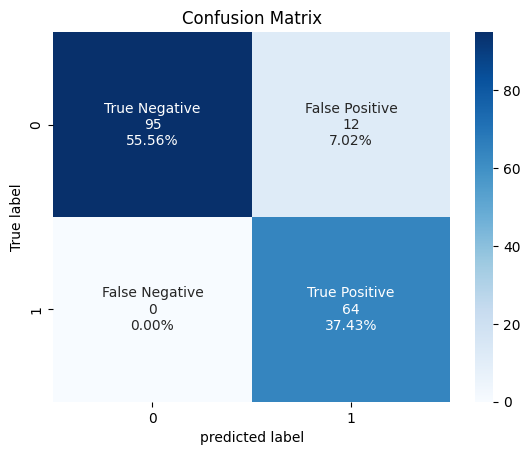

[[95 12]
 [ 0 64]]
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94       107
         1.0       0.84      1.00      0.91        64

    accuracy                           0.93       171
   macro avg       0.92      0.94      0.93       171
weighted avg       0.94      0.93      0.93       171

weighted_f1_score :  93.07476612322886


In [57]:
model_5 = GaussianNB(var_smoothing=NB_var_smoothing)
algorithm(model_5, X_train, y_train, X_test, y_test, Accuracy)

# SVM
Tập dữ liệu D vừa và nhỏ nên ta sẽ dùng phương pháp đánh giá cross-validation

k-fold cross-validation. Phương pháp này gồm các bước như sau:
- Tập dữ liệu D được chia thành k tập con không giao nhau gọi là “fold” có kích thước xấp xỉ nhau.
- Mỗi lần lặp, một tập con trong k tập sẽ được dùng để làm tập kiểm thử, (k-1) tập còn lại sẽ được sử dụng làm tập huấn luyện.
- k giá trị lỗi trong các lần lặp, trong đó mỗi giá trị lỗi tương ứng với mỗi “fold” sẽ
 được tính trung bình cộng để thu được giá trị lỗi tổng thể.

Với dữ liệu y tế hoặc chẩn đoán, F1-score là thước đo phù hợp hơn so với accuracy do:
- Mất cân bằng dữ liệu (thường có nhiều mẫu lành tính hơn mẫu ác tính).
- Tầm quan trọng của việc cân bằng giữa precision và recall, nhằm giảm thiểu rủi ro của các dự đoán sai.
--> F1-score kết hợp precision và recall thành một thước đo duy nhất, hữu ích trong các trường hợp dữ liệu mất cân bằng hoặc cần cân nhắc kỹ về các lỗi dương tính giả và âm tính giả. Với F1-score cao, mô hình vừa có khả năng phát hiện đúng các mẫu dương tính vừa tránh các lỗi quan trọng như bỏ sót trường hợp ung thư hoặc gian lận.

In [58]:
from sklearn.model_selection import GridSearchCV # Tích hợp cross-validation

# Thiết lập không gian tham số quan trọng trong mô hình SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

# Tìm kiếm tham số tối ưu
# f1 ở đây cụ thể là weighted avg f1-score đúng không ? 
grid_search = GridSearchCV(SVC(), param_grid, cv=10     , scoring=make_scorer(f1_score, average='weighted')) # cv = 5 tức là k-fold ở đây k = 5
grid_search.fit(X_train, y_train)

# Kết quả
print("Best Parameters:", grid_search.best_params_)
svm_C = grid_search.best_params_.get('C')
svm_gamma = grid_search.best_params_.get('gamma')
svm_kernel = grid_search.best_params_.get('kernel')

print(svm_C, svm_gamma, svm_kernel)

print("Best cross-validated score:", grid_search.best_score_)
# Sử dụng tham số tốt nhất để huấn luyện lại mô hình
best_svm_model = grid_search.best_estimator_
y_pred_optimized = best_svm_model.predict(X_test)

# Đánh giá mô hình tối ưu
print("\nConfusion Matrix (Optimized):")
print(confusion_matrix(y_test, y_pred_optimized))

print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_optimized))

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
10 0.01 rbf
Best cross-validated score: 0.9692823863682358

Confusion Matrix (Optimized):
[[104   3]
 [  1  63]]

Classification Report (Optimized):
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       107
         1.0       0.95      0.98      0.97        64

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



rbf
10
0.01
confusion matrix


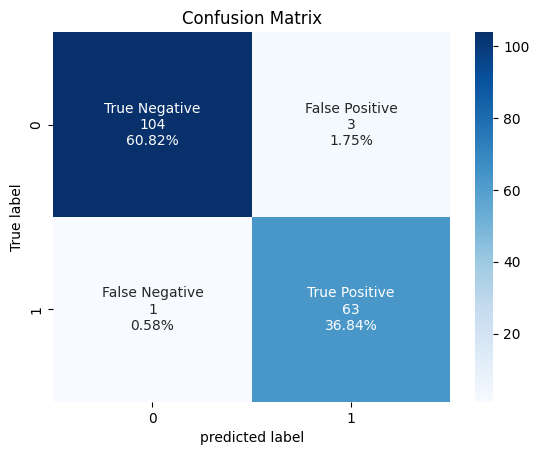

[[104   3]
 [  1  63]]
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       107
         1.0       0.95      0.98      0.97        64

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

weighted_f1_score :  97.66777854166136


In [59]:
model_6 = SVC(kernel=svm_kernel, C=svm_C, gamma=svm_gamma, random_state=30) # kernel='rbf' là kernel Gaussian phổ biến cho dữ liệu phi tuyến
#model_6.fit(X_train, y_train)
print(model_6.kernel)
print(model_6.C)
print(model_6.gamma)
algorithm(model_6, X_train, y_train, X_test, y_test, Accuracy)

confusion matrix


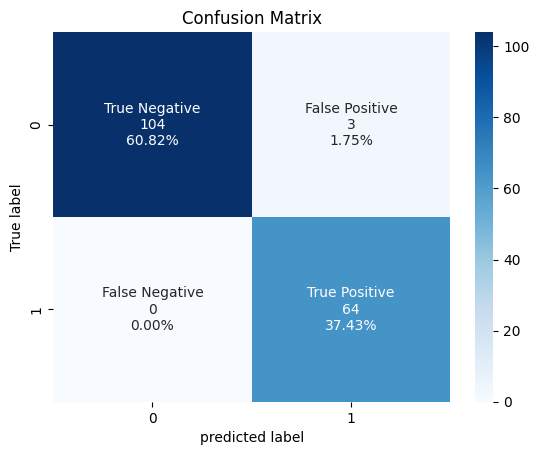

[[104   3]
 [  0  64]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       107
         1.0       0.96      1.00      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.99      0.98       171
weighted avg       0.98      0.98      0.98       171

weighted_f1_score :  98.25323048585975


In [60]:
from sklearn.ensemble import VotingClassifier

# voting = 'hard': nhãn cuối cùng được chọn dựa trên số phiếu bầu, tức là số lượng mô hình học máy đồng thuận
model_7 = VotingClassifier(estimators=[('RF', model_1), ('KNN', model_3), ('LR', model_4), ('NB', model_5), ('SVM', model_6)], voting='hard')
algorithm(model_7, X_train, y_train, X_test, y_test, Accuracy)

In [61]:
print(Accuracy)

[94.78430375455547, 97.6608187134503, 98.83388927083068, 93.07476612322886, 97.66777854166136, 98.25323048585975]


In [62]:
score = pd.DataFrame({'Algorithm':Algorithm,'Weighted_f1':Accuracy })
score

,Algorithm,Weighted_f1
0,RandomForest,94.784304
1,KNeighborsClassifier,97.660819
2,LogisticRegression,98.833889
3,Naive Bayes,93.074766
4,SVM,97.667779
5,VotingClassifier,98.253230


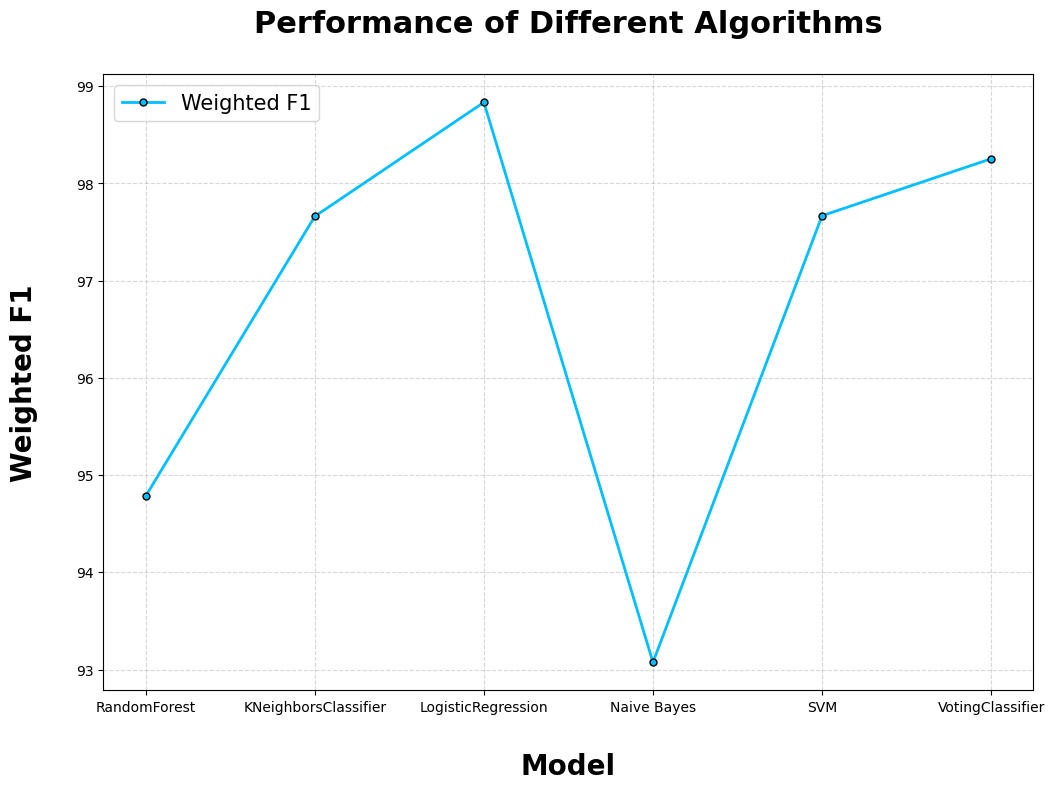

In [63]:
# Tạo hình vẽ với kích thước lớn hơn
fig = plt.figure(figsize=(12,8))

# Vẽ đồ thị với màu sắc và kiểu marker khác
plt.plot(score.Algorithm, score.Weighted_f1, 
         label='Weighted F1', 
         lw=2, color='deepskyblue', # lw = line width là độ dày của đường trong biểu đồ
         marker='o', markersize=5, # marker='o' là kiểu marker hình tròn, markersize=5 là kích thước của marker
         markeredgewidth=1, markeredgecolor='black')

# Thêm lưới (grid)
plt.grid(True, linestyle='--', alpha=0.5)

# Thêm legend
plt.legend(fontsize=15, loc='upper left')

# Đặt nhãn cho trục X và Y
plt.xlabel('\nModel', fontsize=20, fontweight='bold')
plt.ylabel('Weighted F1\n', fontsize=20, fontweight='bold')

# Thêm tiêu đề cho biểu đồ
plt.title('Performance of Different Algorithms\n', fontsize=22, fontweight='bold')

# Hiển thị biểu đồ
plt.show()
